In [1]:
import gist
import numpy as np
import pandas as pd
import sklearn as sk
import random
import math as mat
import imagehash
import matplotlib.pyplot as plt
from PIL import Image
from skimage import transform
from sklearn.neighbors import BallTree
from sklearn.neighbors import DistanceMetric
#import warnings
# import sys
# if not sys.warnoptions:
#     warnings.simplefilter("ignore")

### Загружаем датасет

In [2]:
path = '/home/subster2/Рабочий стол/Диплом/memsgenerator/memegenerator1.csv'
df = pd.read_csv(path, sep=',', encoding ='utf-16')
df = df.drop(df[df['Base Meme Name'].isna()].index)

### Функция пресижн/реколл

In [3]:
def RecPrec(N,hashFunc,xstart=1,xfinish=25, rad = 1, ifprint = 'Print'):# номер картинки,хешфункция,от, до, радиус, печать графика
    valueRec=[]
    valuePrec=[]
    indRadius=[]
    tmpltNme = df['Base Meme Name'][N] #название шаблона
    lenoftmplt = len(df[df['Base Meme Name']== tmpltNme])#кол-во картинок с базовым шаблоном в фрейме
    for radius in np.arange(xstart, xfinish):
        ind = tree.query_radius(hashFunc[N:N+1], r=radius/rad)  #индексы похожих эл-ов
        sumRaP=0
#         for i in ind[0]:  вернуть если что
#                 if((df['Base Meme Name'][i]== tmpltNme)): #мемы, название которых совпадает с шаблоном
#                     sumRaP+=1
        sumRaP=sum(df['Base Meme Name'][ind[0]].values== tmpltNme)        
        valueRec.append(sumRaP/lenoftmplt)#recall(делим на кол-во всех картинок шаблона)
        valuePrec.append(sumRaP/len(ind[0]))#precision(делим на кол-во близких картинок)
        indRadius.append(radius)
    if(ifprint == 'Print'):
        plt.plot(indRadius,valueRec,color = 'red')#recall красный
        plt.plot(indRadius,valuePrec,color = 'blue')#precision голубой
        plt.xlabel('Радиус')
    return valueRec,valuePrec

### Считаем GIST

In [4]:
%%time
#считаем хэш
global imgGist 
imgGist = []
imsize = (64, 64)
count = 0
for i in df['Meme ID']:
    path_to_image = '/home/subster2/Рабочий стол/memes/{}.jpg'.format(i)# путь к папке
    j = np.asarray(Image.open(path_to_image))#
    img_resized = transform.resize(j, imsize, preserve_range=True).astype(np.uint8)
    desc = gist.extract(img_resized)
    imgGist.append(desc)# добавляем в массив новый Gist
    count+=1
    if(count%10000==0):
        print(count)

10000
20000
30000
40000
50000
CPU times: user 22min 7s, sys: 19min 48s, total: 41min 55s
Wall time: 14min 2s


In [9]:
#метрика
metrics=DistanceMetric.get_metric('euclidean')
tree = BallTree(imgGist, metric=metrics)

In [12]:
# Просмотр шаблонов
import time

for i in df['Base Meme Name'].unique():
    print(df[df['Base Meme Name']==i][:1].index[0])
    print(i)
    k = df[df['Base Meme Name']==i][:1].index[0]
    for j in df[df['Base Meme Name']==i].index:
        path_to_image = '/home/subster2/Рабочий стол/memes/{}.jpg'.format(df['Meme ID'][j])
        display(Image(filename = path_to_image, width=100, height=100))
    print(RecPrec(k,0,3))
    time.sleep(20)
len(df['Base Meme Name'].unique())


#print(df[df['Base Meme Name'] == 'Spiderman Approves']['Meme ID'])
#path_to_image = '/home/subster2/Рабочий стол/memes/{}.jpg'.format(df['Meme ID'][53859])
#Image(filename = path_to_image, width=100, height=100)



1913
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
[ 722.17301416 1463.49549796] [1901.91666667  938.58089124]
CPU times: user 3min 47s, sys: 0 ns, total: 3min 47s
Wall time: 3min 47s


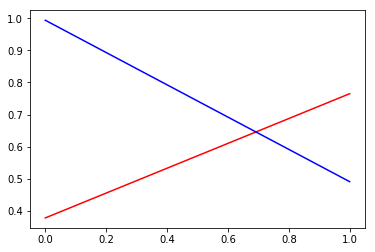

In [11]:
%%time

N = len(df['Base Meme Name'].unique())  
print(N)  

def add(x, y):
        return list(map(lambda a, b: a + b, x, y))
    
sumRecprec = RecPrec(N = 0,hashFunc = imgGist,xstart=0,xfinish =2, ifprint = 0)
for i, j in enumerate(df['Base Meme Name'].unique()):
    k = df[df['Base Meme Name']==j][:1].index[0]
    if (k == 0): continue
    x = RecPrec(N = k,hashFunc = imgGist,xstart=0,xfinish =2, ifprint = 0)
    sumRecprec = add(sumRecprec[0],x[0]),add(sumRecprec[1],x[1])
    if(i%100==0):
        print(i)
    
asd = np.asarray(sumRecprec[0])
asd2 = np.asarray(sumRecprec[1])
print(asd, asd2)
plt.plot(range(0,2),asd/N,color = 'red')#recall красный
plt.plot(range(0,2),asd2/N,color = 'blue')#precisition голубой

### Считаем ImageHash


In [13]:
%%time
global imgH
imgH = []
for i in df['Meme ID']:
    path_to_image = '/home/subster2/Рабочий стол/memes/{}.jpg'.format(i)# путь к папке
    j = imagehash.phash(Image.open(path_to_image))# строим pHash
    imgH.append(np.ndarray.flatten(j.hash))# добавляем в массив новый pHash

CPU times: user 1min 17s, sys: 985 ms, total: 1min 18s
Wall time: 1min 18s


In [14]:
# метрика
metrics=DistanceMetric.get_metric('hamming')
tree = BallTree(imgH, metric=metrics)

1913
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
[1172.5094829  1172.5094829  1304.02248391 1304.02248391 1407.37794694] [1196.23743747 1196.23743747 1127.46148875 1127.46148875 1019.66088689]


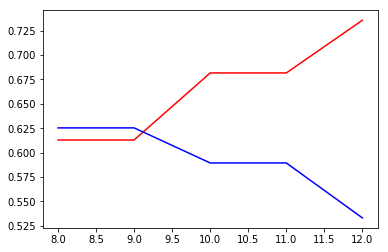

In [18]:
N = len(df['Base Meme Name'].unique())  
print(N)  

def add(x, y):
        return list(map(lambda a, b: a + b, x, y))
    
sumRecprec = RecPrec(N = 0,hashFunc = imgH,xstart=8,xfinish =13,rad = 64, ifprint = 0)
for i, j in enumerate(df['Base Meme Name'].unique()):
    k = df[df['Base Meme Name']==j][:1].index[0]
    if (k == 0): continue
    x = RecPrec(N = k,hashFunc = imgH,xstart=8,xfinish =13,rad = 64, ifprint = 0)
    sumRecprec = add(sumRecprec[0],x[0]),add(sumRecprec[1],x[1])
    if(i%100==0):
        print(i)
    
asd = np.asarray(sumRecprec[0])
asd2 = np.asarray(sumRecprec[1])
print(asd, asd2)
plt.plot(range(8,13),asd/N,color = 'red')#recall красный
plt.plot(range(8,13),asd2/N,color = 'blue')#precisition голубой